In [12]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning tools
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Show head
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
train_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


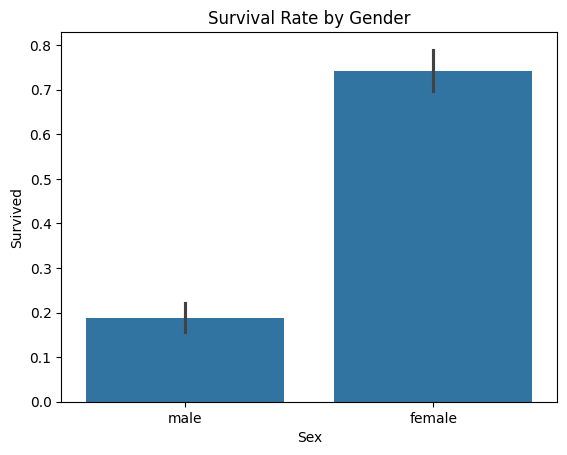

In [15]:
# Check survival rate by sex (for understanding)
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

But not all of these columns are useful or easy to work with (like Name, Cabin, Ticket, etc.). So we choose a clean subset of features.

In [16]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']  # ✅ Choose these 7 useful columns
X = train_df[features]  # ⬅️ This is your input features (independent variables)
y = train_df['Survived']  # ⬅️ This is your target label (what you want to predict)


In [17]:
X.isnull().sum()

,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


# 1. Fill missing values in Age and Fare (numerical features)

In [18]:
# Fill missing 'Age' with median
X['Age'] = X['Age'].fillna(X['Age'].median())

# Fill missing 'Fare' with median
X['Fare'] = X['Fare'].fillna(X['Fare'].median())


# 2. Fill missing values in Embarked (categorical feature)

In [19]:
# Fill missing 'Embarked' with the most frequent value (mode)
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])


In [20]:
X.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# **One-Hot Encoding**
🧠 Why drop_first=True?
It avoids duplicate/redundant columns (called multicollinearity).
So you’ll get:

Sex_male (1 = male, 0 = female)

Embarked_Q, Embarked_S (C is dropped)

In [21]:
# One-hot encode 'Sex' and 'Embarked' columns
# X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# One-hot encode 'Sex' and 'Embarked' columns with 0/1 instead of True/False
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

# Show the updated columns
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only scale numeric features
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,-0.565736,1,0,-0.502445,1,0,1
1,1,0.663861,1,0,0.786845,0,0,0
2,3,-0.258337,0,0,-0.488854,0,0,1
3,1,0.433312,1,0,0.420730,0,0,1
4,3,0.433312,0,0,-0.486337,1,0,1


# **train-test Split**

In [23]:
from sklearn.model_selection import train_test_split

# Split X and y (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **train with Random forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train it
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **Predict & Evaluate**

In [25]:
from sklearn.metrics import accuracy_score

# Make predictions on validation set
y_pred = model.predict(X_val)

# Accuracy score
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", round(accuracy * 100, 2), "%")


Validation Accuracy: 81.56 %


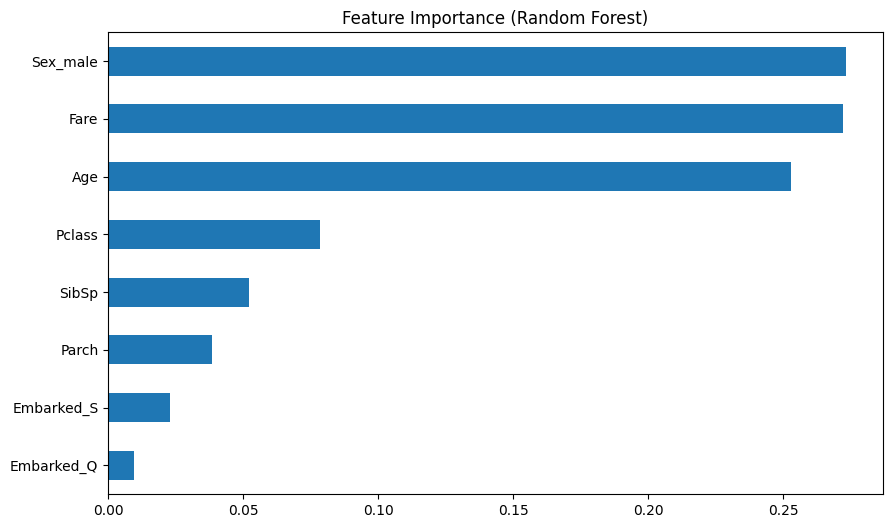

In [26]:
# View feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.show()
